In [1]:
from hossam import load_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler, StandardScaler

my_dpi =200

In [2]:
origin =load_data("game_usage")
origin.head()

[data] https://data.hossam.kr/ml-lab01/game_usage.xlsx
[desc] 게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터
[!] Cannot read metadata


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


# 데이터 살펴보기

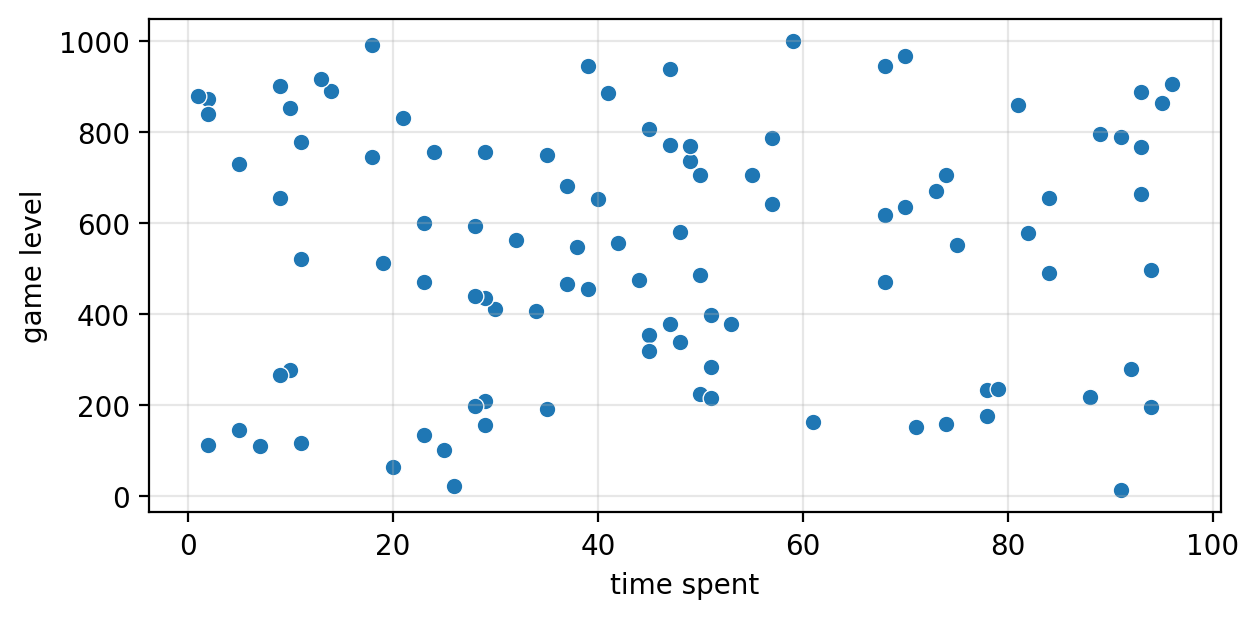

In [3]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.scatterplot(data=origin, x='time spent', y="game level")

ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

# 그룹으로 묶어보자

In [4]:
#모델 객체 생성
estimator = KMeans(n_clusters=4)

#모델을 학습시킴
estimator.fit(origin)

#예측
cluster_pred = estimator.predict(origin)
cluster_pred

array([0, 3, 0, 0, 1, 0, 2, 2, 1, 2, 0, 3, 1, 3, 0, 1, 0, 1, 0, 3, 3, 0,
       1, 3, 1, 0, 3, 1, 2, 3, 3, 0, 2, 1, 0, 3, 2, 1, 1, 0, 2, 0, 0, 3,
       0, 3, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 3, 0, 2, 1, 3, 3, 3, 2, 0,
       2, 1, 2, 3, 0, 2, 1, 1, 0, 1, 0, 0, 1, 3, 1, 3, 2, 0, 1, 3, 0, 2,
       1, 1, 0, 3, 2, 3, 0, 0, 2, 0, 1, 2], dtype=int32)

In [5]:
df=origin.copy()
df["그룹번호"] = cluster_pred
df

,time spent,game level,그룹번호
0,39,944,0
1,55,705,3
2,29,757,0
3,59,999,0
4,7,109,1
...,...,...,...
95,47,939,0
96,50,485,2
97,13,916,0
98,79,235,1


C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\37477425.py:13: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\37477425.py:13: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\37477425.py:13: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\37477425.py:13: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:

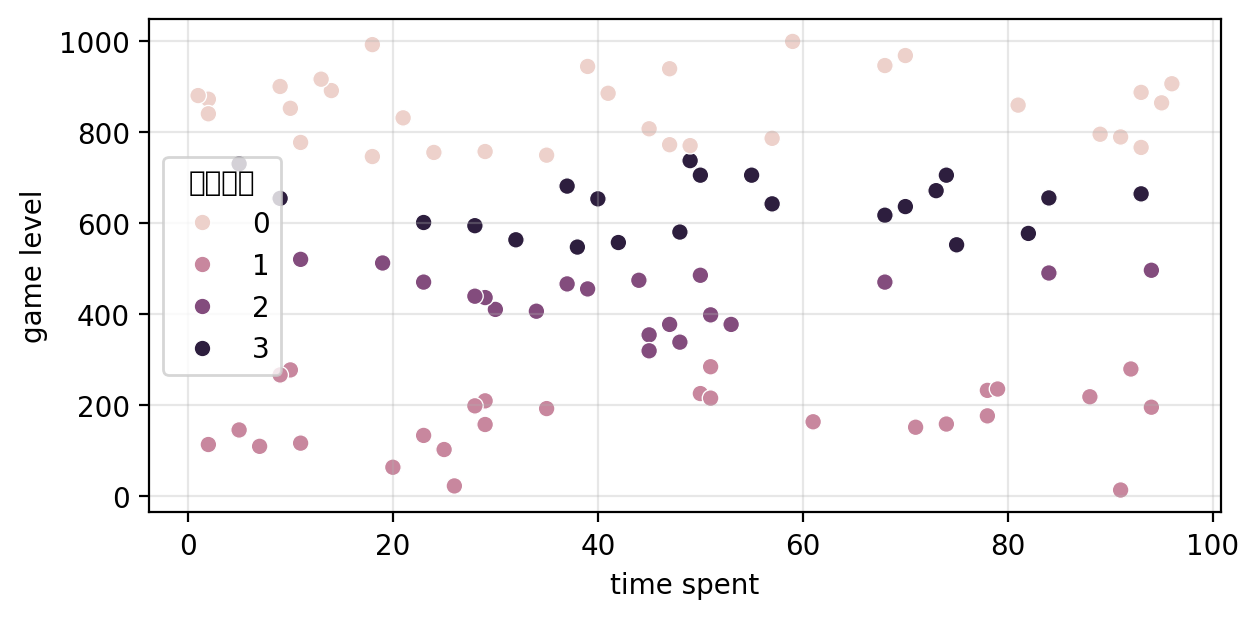

In [6]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.scatterplot(data=df, x='time spent', y="game level", hue="그룹번호")

ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2699627185.py:38: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2699627185.py:38: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2699627185.py:38: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2699627185.py:38: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabt

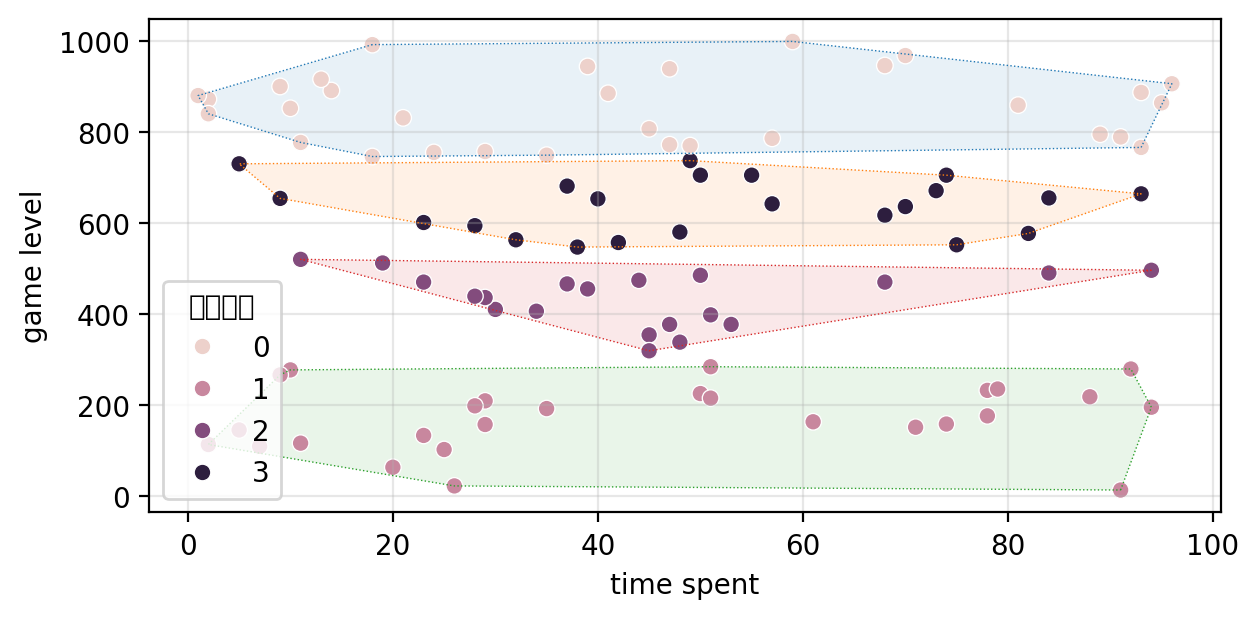

In [7]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

#----------------------------------------------
# 고급진 코드!
#----------------------------------------------
#군집별 값의 종류별로 반복
for c in df["그룹번호"].unique():
    #값의 종류별로 데이터프레임을 나눔
    df_c =df.loc[df["그룹번호"]==c, ["time spent", "game level"]]

    try:
        #외곽선 좌표 개산
        hull = ConvexHull(df_c)

        #마지막 좌효 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot( #type:ignore
            df_c.iloc[points, 0], df_c.iloc[points,1], linewidth=0.5, linestyle=":"
            )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)

    except:
        pass




sb.scatterplot(data=df, x='time spent', y="game level", hue="그룹번호")
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

# 데이터 표준화 적용

C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2161074583.py:38: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2161074583.py:38: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2161074583.py:38: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\2161074583.py:38: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabt

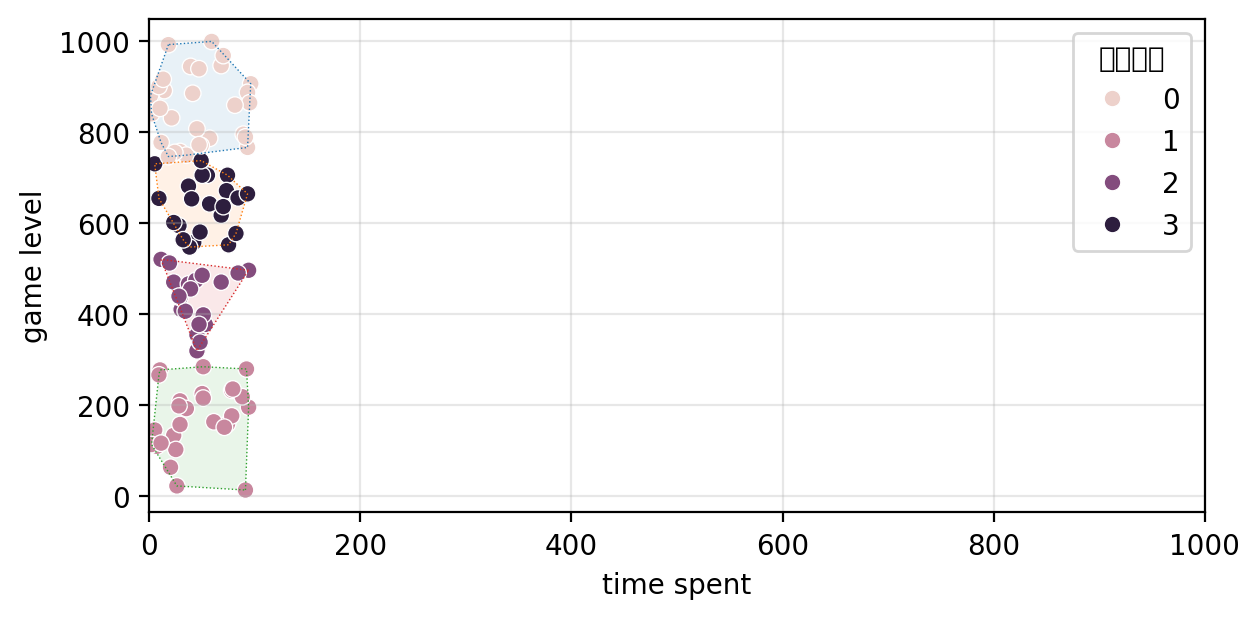

In [8]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

#----------------------------------------------
# 고급진 코드!
#----------------------------------------------
#군집별 값의 종류별로 반복
for c in df["그룹번호"].unique():
    #값의 종류별로 데이터프레임을 나눔
    df_c =df.loc[df["그룹번호"]==c, ["time spent", "game level"]]

    try:
        #외곽선 좌표 개산
        hull = ConvexHull(df_c)

        #마지막 좌효 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot( #type:ignore
            df_c.iloc[points, 0], df_c.iloc[points,1], linewidth=0.5, linestyle=":"
            )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)

    except:
        pass




sb.scatterplot(data=df, x='time spent', y="game level", hue="그룹번호")
ax.grid(True, alpha=0.3)
ax.set_xlim([0,1000])

plt.tight_layout()
plt.show()
plt.close()

In [9]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(origin), columns=origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


In [10]:
#모델 객체 생성
estimator = KMeans(n_clusters=4)

#모델 학습
estimator.fit(sdf)

#예측
cluster =estimator.predict(sdf)
sdf["그룹번호"]=cluster
sdf

,time spent,game level,그룹번호
0,-0.250733,1.474805,0
1,0.326494,0.606546,0
2,-0.611500,0.795456,0
3,0.470801,1.674613,0
4,-1.405187,-1.558652,1
...,...,...,...
95,0.037881,1.456640,0
96,0.146111,-0.192688,0
97,-1.188727,1.373084,2
98,1.192335,-1.100909,1


C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\278716297.py:38: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\278716297.py:38: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\278716297.py:38: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\278716297.py:38: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools

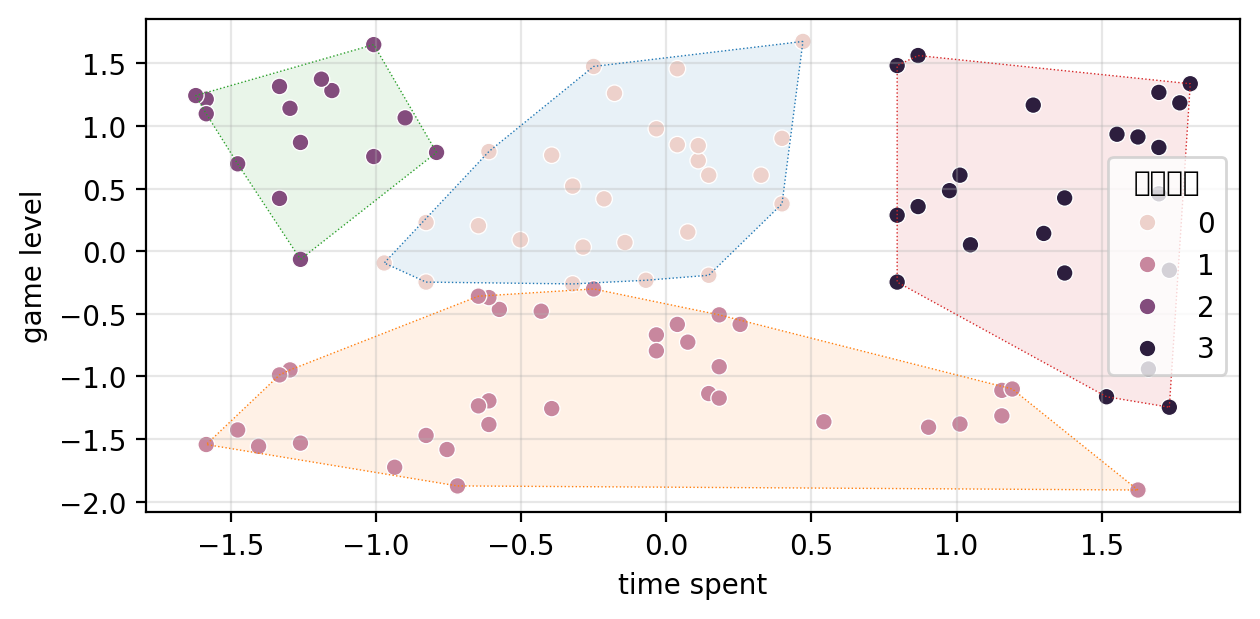

In [11]:
width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

#----------------------------------------------
# 고급진 코드!
#----------------------------------------------
#군집별 값의 종류별로 반복
for c in sdf["그룹번호"].unique():
    #값의 종류별로 데이터프레임을 나눔
    df_c =sdf.loc[sdf["그룹번호"]==c, ["time spent", "game level"]]

    try:
        #외곽선 좌표 개산
        hull = ConvexHull(df_c)

        #마지막 좌효 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot( #type:ignore
            df_c.iloc[points, 0], df_c.iloc[points,1], linewidth=0.5, linestyle=":"
            )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)

    except:
        pass




sb.scatterplot(data=sdf, x='time spent', y="game level", hue="그룹번호")
ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
plt.close()

C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\340766858.py:47: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\340766858.py:47: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\340766858.py:47: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_6852\340766858.py:47: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\itwill\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools

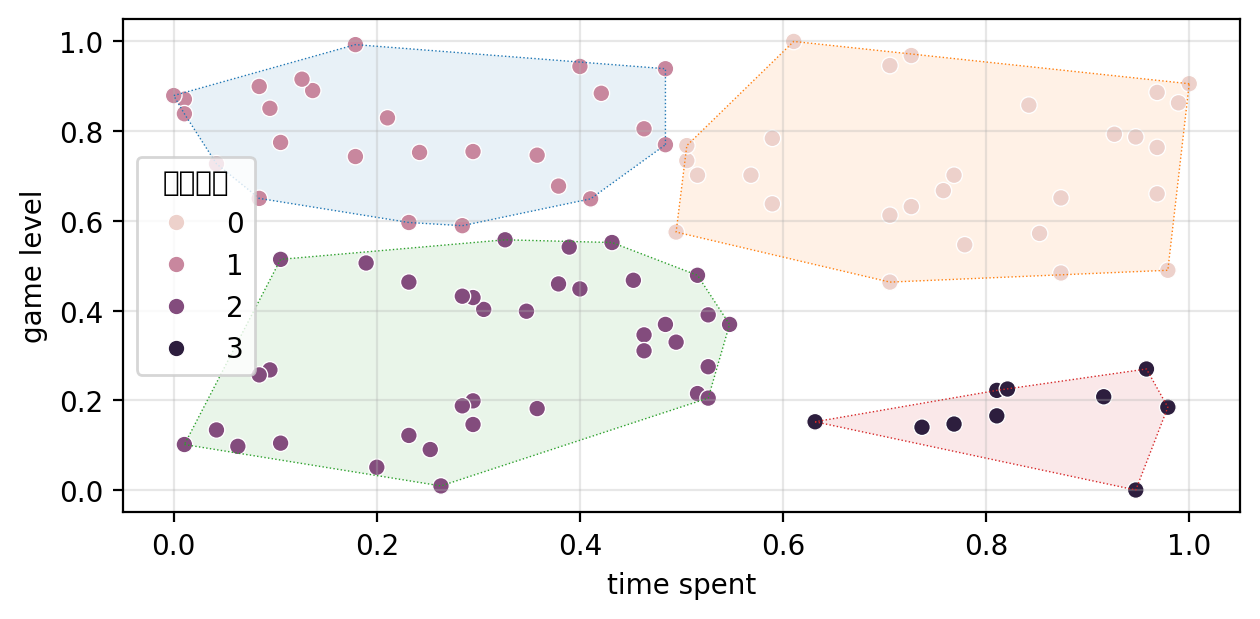

In [12]:
scaler = MinMaxScaler()
mdf = DataFrame(scaler.fit_transform(origin), columns=origin.columns)
#모델 객체 생성
estimator = KMeans(n_clusters=4)
#모델 학습
estimator.fit(mdf)
#예측
cluster = estimator.predict(mdf)
mdf["그룹번호"] = cluster

width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

#----------------------------------------------
# 고급진 코드!
#----------------------------------------------
#군집별 값의 종류별로 반복
for c in mdf["그룹번호"].unique():
    #값의 종류별로 데이터프레임을 나눔
    df_c =mdf.loc[mdf["그룹번호"]==c, ["time spent", "game level"]]

    try:
        #외곽선 좌표 개산
        hull = ConvexHull(df_c)

        #마지막 좌효 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot( #type:ignore
            df_c.iloc[points, 0], df_c.iloc[points,1], linewidth=0.5, linestyle=":"
            )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)

    except:
        pass




sb.scatterplot(data=mdf, x='time spent', y="game level", hue="그룹번호")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()